In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import skew, kurtosis
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
df_boston = pd.read_csv('Boston.csv',index_col = 0)

In [3]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df_boston.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
df_boston.shape

(506, 14)

In [6]:
df_boston.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [7]:
df_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
np.mean(df_boston['age'])

68.57490118577076

In [9]:
np.median(df_boston['age'])

77.5

In [10]:
np.mean(df_boston['medv'])

22.532806324110677

In [11]:
df_boston['zn'].value_counts()

0.0      372
20.0      21
80.0      15
22.0      10
12.5      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
95.0       4
60.0       4
21.0       4
33.0       4
55.0       3
70.0       3
34.0       3
52.5       3
35.0       3
28.0       3
75.0       3
82.5       2
85.0       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64

In [12]:
df_boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

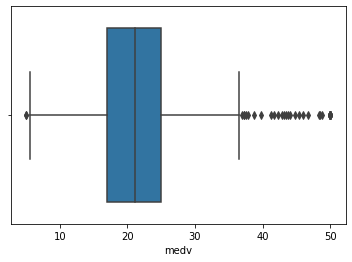

In [13]:
sns.boxplot(df_boston['medv'])

In [14]:
q1 = np.quantile(df_boston['medv'],0.25)
q1

17.025

In [15]:
# second quantile is the median
q2 = np.quantile(df_boston['medv'],0.5)
q2

21.2

In [16]:
q3 = np.quantile(df_boston['medv'],0.75)
q3

25.0

In [17]:
# Inter Quartile Range
iqr = q3 - q1
iqr

7.975000000000001

In [18]:
upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)
print('upper bound is {} and lower bound is {}'.format(upper_bound,lower_bound))

upper bound is 36.962500000000006 and lower bound is 5.0624999999999964


In [19]:
df_outliers = df_boston[(df_boston['medv'] > upper_bound) | (df_boston['medv'] < lower_bound)]

In [20]:
df_outliers.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
98,0.12083,0.0,2.89,0,0.445,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
99,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
158,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
162,1.46336,0.0,19.58,0,0.605,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
163,1.83377,0.0,19.58,1,0.605,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0


In [21]:
df_outliers.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
371,6.53876,0.0,18.1,1,0.631,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
372,9.23230,0.0,18.1,0,0.631,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0
373,8.26725,0.0,18.1,1,0.668,5.875,89.6,1.1296,24,666,20.2,347.88,8.88,50.0
399,38.35180,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
406,67.92080,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [22]:
df_outliers.shape

(40, 14)

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='medv', ylabel='Density'>

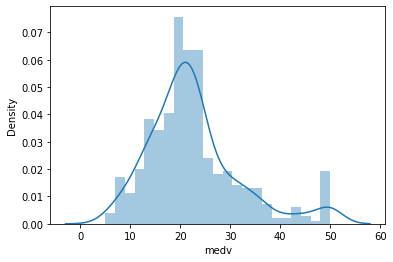

In [23]:
sns.distplot(df_boston['medv'])

In [24]:
skew(df_boston['medv'])

1.104810822864635

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='crim', ylabel='Density'>

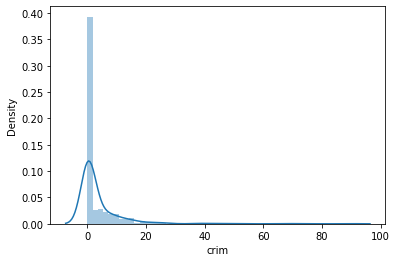

In [25]:
sns.distplot(df_boston['crim'])

In [26]:
crim_skew = skew(df_boston['crim'])

In [27]:
crim_skew

5.207652387859715

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

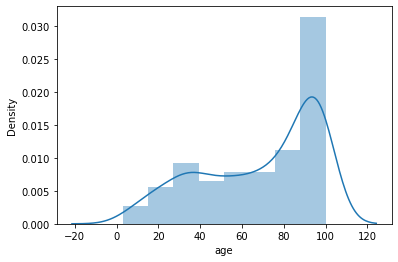

In [28]:
sns.distplot(df_boston['age'])

In [29]:
skew(df_boston['age'])

-0.5971855948016143

In [30]:
kurtosis(df_boston['age'])

-0.97001392664039

In [31]:
kurtosis(df_boston['crim'])

36.75278626142281

In [32]:
kurtosis(df_boston['medv'])

1.4686287722747462

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='crim'>

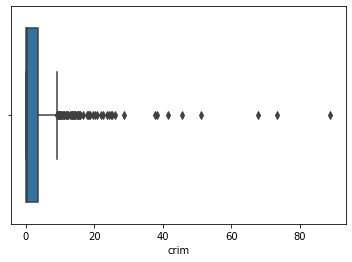

In [33]:
sns.boxplot(df_boston['crim'])

**Log transformation can only be done with data which doesn't have zero values**

In [34]:
crim_log = np.log(df_boston['crim'])

In [35]:
skew(crim_log)

0.40473014342603986

In [36]:
print('The skewness before the log transformation was {}, after log transformation it is {}'.format(crim_skew,crim_log))

The skewness before the log transformation was 5.207652387859715, after log transformation it is 1     -5.064036
2     -3.600502
3     -3.601235
4     -3.430523
5     -2.672924
         ...   
502   -2.770511
503   -3.095111
504   -2.800824
505   -2.211009
506   -3.048922
Name: crim, Length: 506, dtype: float64


In [38]:
outlier_ub = q3 + (1.5 * iqr)
outlier_lb = q1 - (1.5 * iqr)

In [44]:
df_boston[(df_boston["medv"]>outlier_ub) | (df_boston["medv"]<outlier_lb)]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
98,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
99,0.08187,0.0,2.89,0,0.4450,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
158,1.22358,0.0,19.58,0,0.6050,6.943,97.4,1.8773,5,403,14.7,363.43,4.59,41.3
162,1.46336,0.0,19.58,0,0.6050,7.489,90.8,1.9709,5,403,14.7,374.43,1.73,50.0
163,1.83377,0.0,19.58,1,0.6050,7.802,98.2,2.0407,5,403,14.7,389.61,1.92,50.0
164,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
167,2.01019,0.0,19.58,0,0.6050,7.929,96.2,2.0459,5,403,14.7,369.30,3.70,50.0
180,0.05780,0.0,2.46,0,0.4880,6.980,58.4,2.8290,3,193,17.8,396.90,5.04,37.2
181,0.06588,0.0,2.46,0,0.4880,7.765,83.3,2.7410,3,193,17.8,395.56,7.56,39.8
183,0.09103,0.0,2.46,0,0.4880,7.155,92.2,2.7006,3,193,17.8,394.12,4.82,37.9


In [47]:
np.cov(df_boston['age'],df_boston['medv'])

array([[792.35839851, -97.58901655],
       [-97.58901655,  84.58672359]])

In [ ]:
np.median(df_boston['medv'])
np.median(df_boston['medv'])

In [91]:
df_boston['medv'] = np.where(df_boston['medv'] >= outlier_ub, np.mean(df_boston['medv']),df_boston['medv'])
df_boston['medv'] = np.where(df_boston['medv'] <= outlier_lb, outlier_lb,df_boston['medv'])

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

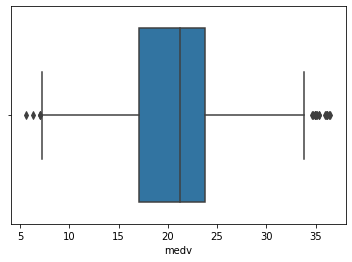

In [92]:
sns.boxplot(df_boston['medv'])

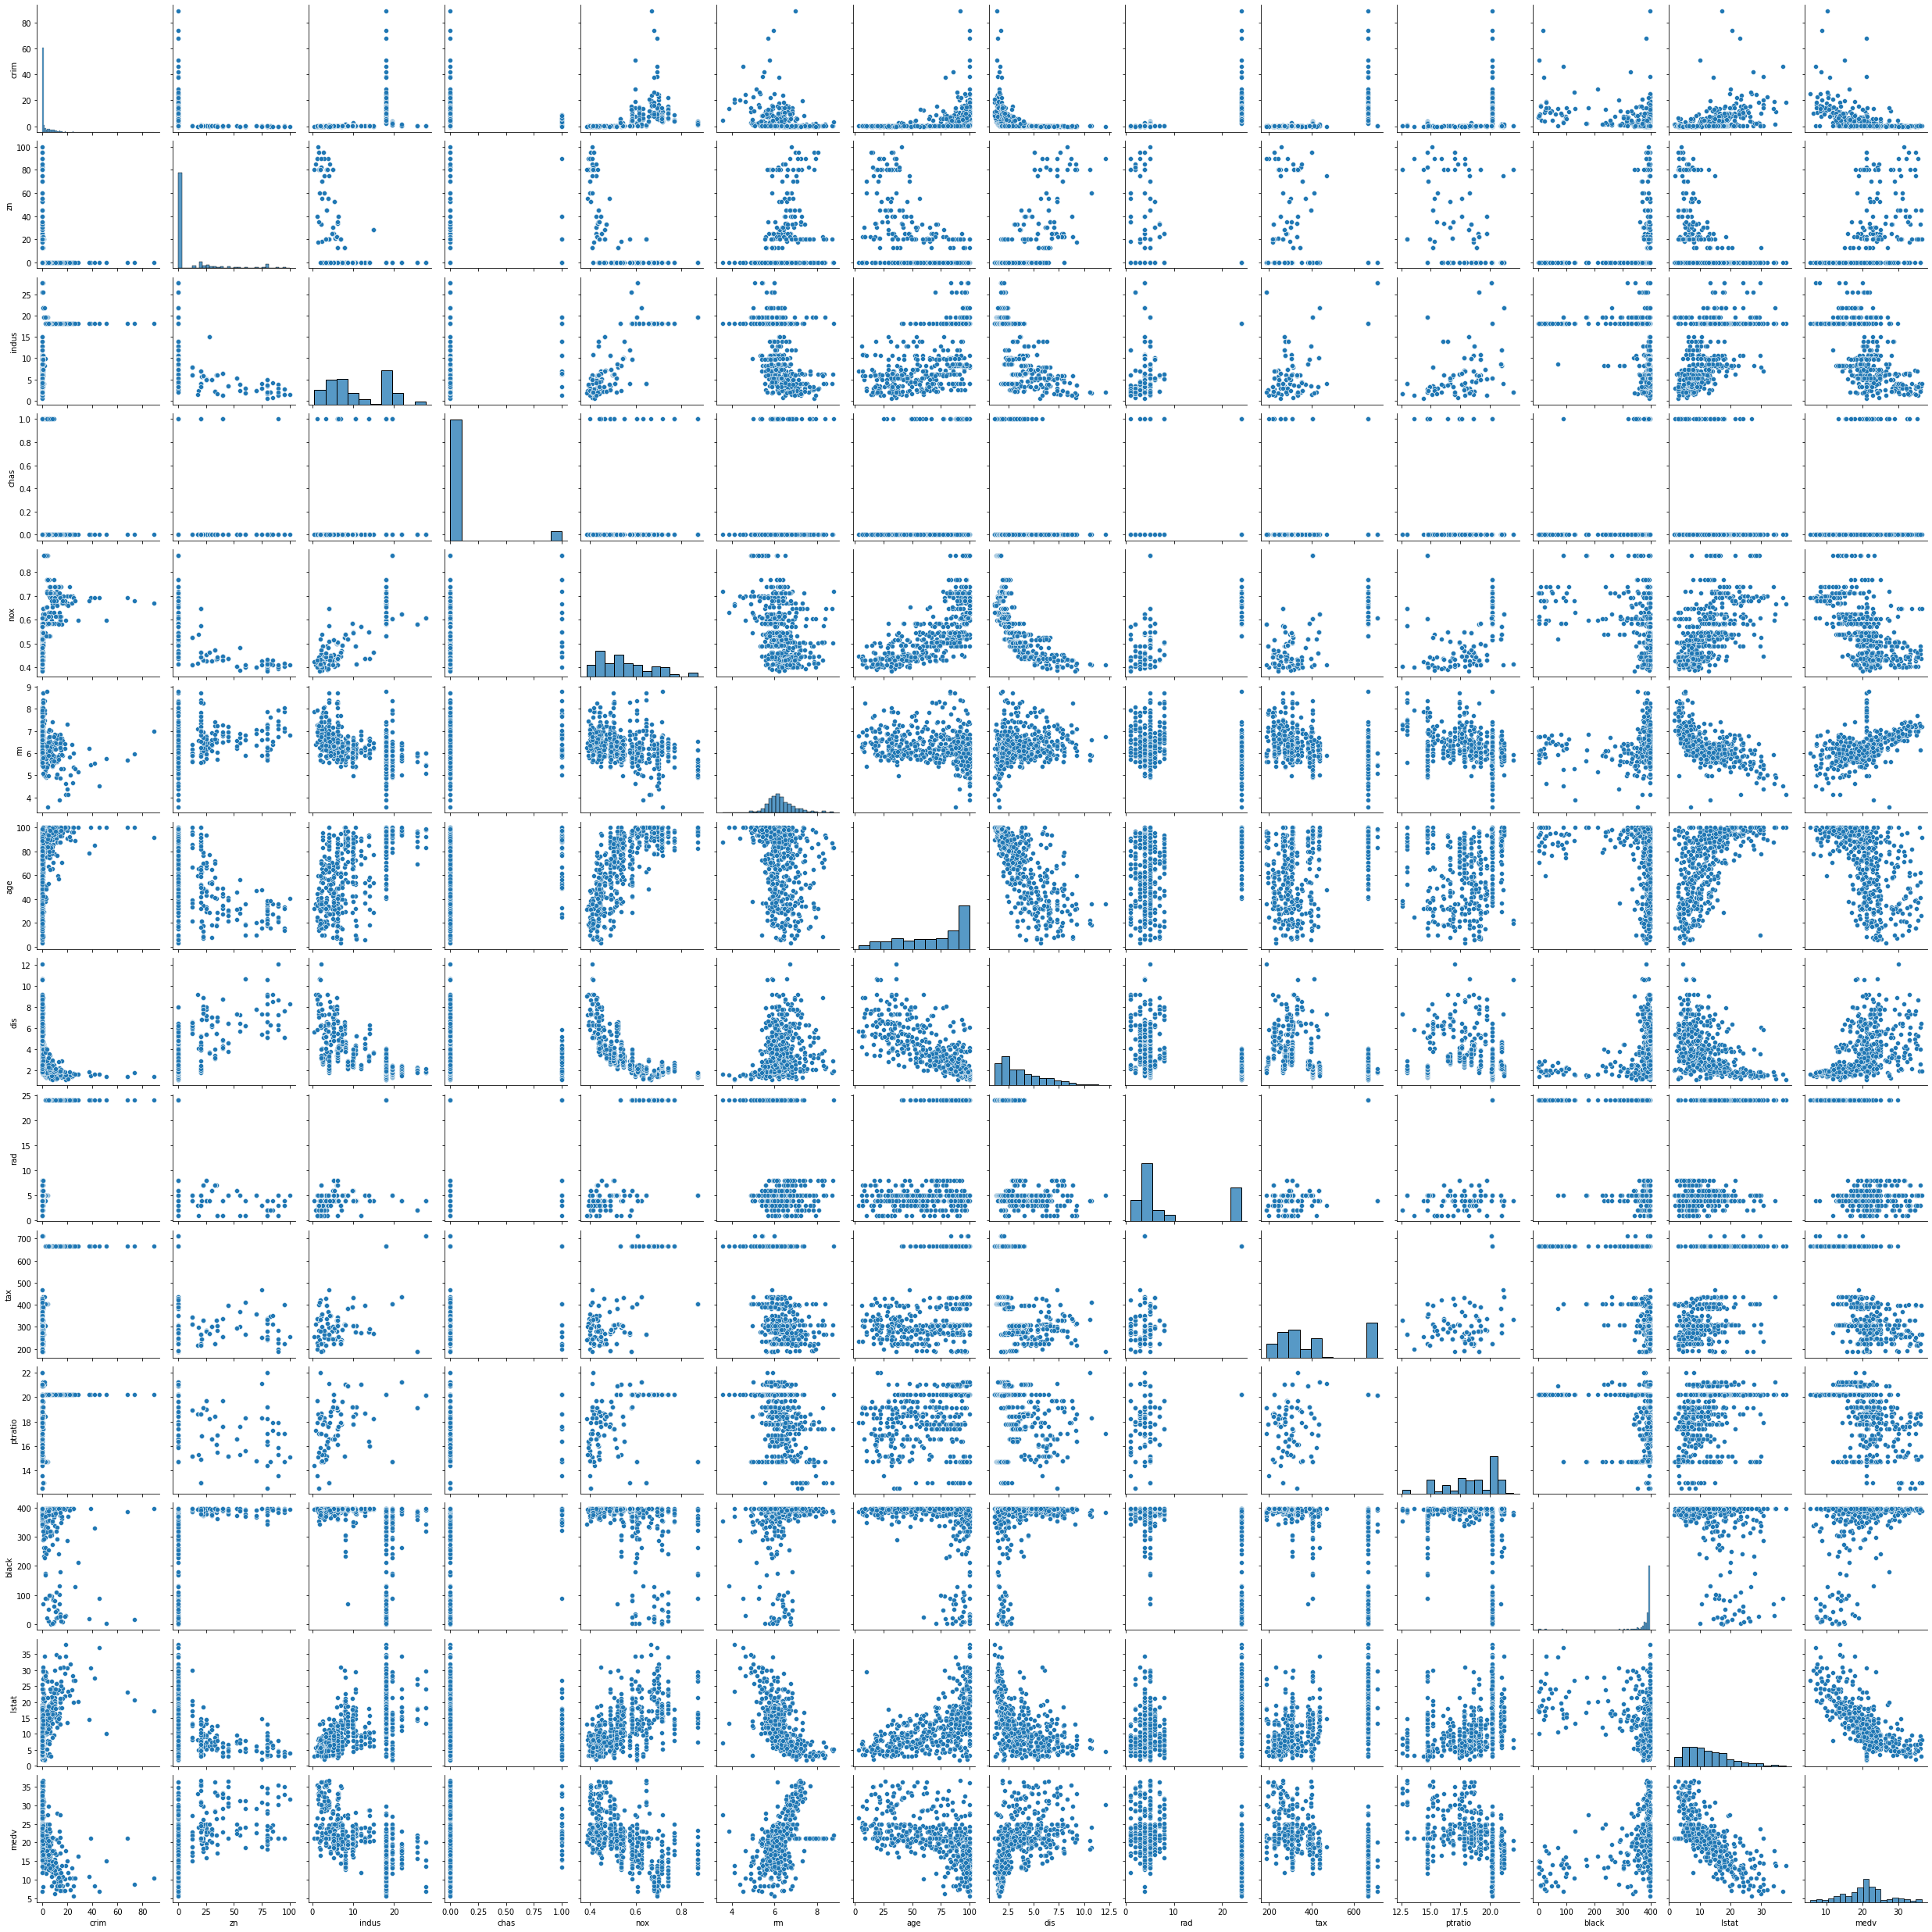

In [57]:
sns.pairplot(df_boston)

In [58]:
df_boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

/home/eshaan/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='crim', ylabel='medv'>

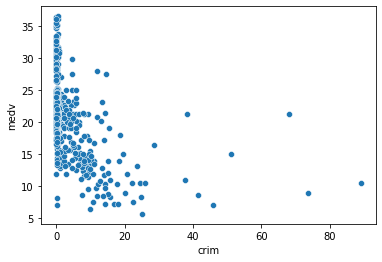

In [59]:
sns.scatterplot(df_boston['crim'],df_boston['medv'])

In [60]:
stats.pearsonr(df_boston['rm'],df_boston['medv'])

(0.4584239920689861, 1.1667139433442234e-27)

In [70]:
corr,_ = stats.pearsonr(df_boston['rm'],df_boston['medv'])

In [71]:
df_corr = corr

In [72]:
df_corr

0.4584239920689861

<AxesSubplot:>

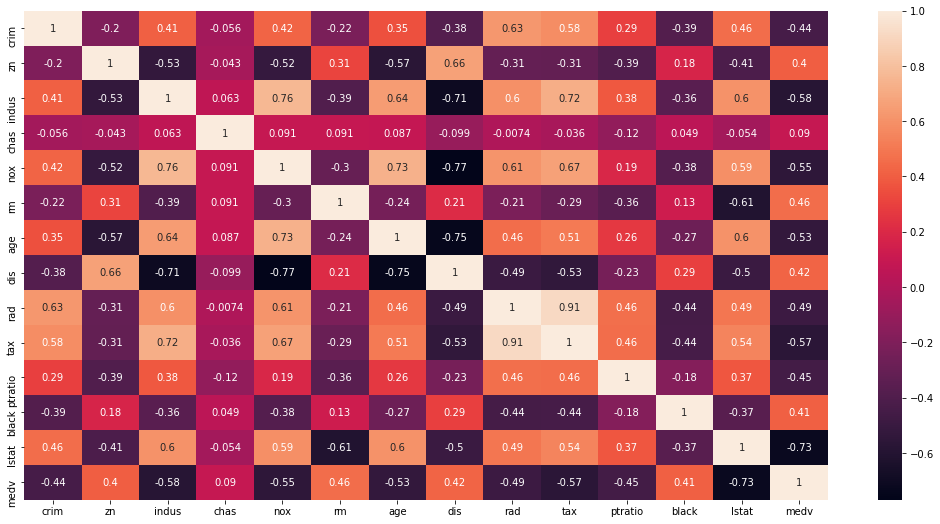

In [82]:
plt.figure(figsize=(18,9))
sns.heatmap(df_boston.corr(),annot = True)

In [85]:
df_food = pd.read_csv('Food_Inspections.csv')

In [86]:
df_food.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2544425,ZALMANS,ZALMANS,2818331.0,NaN,Risk 1 (High),2931 W TOUHY AVE,CHICAGO,IL,60645.0,11/17/2021,License,Not Ready,NaN,42.011879,-87.703370,"(-87.70337002780445, 42.01187856476175)"
1,2537744,GETIR,GETIR,2812822.0,Grocery Store,Risk 3 (Low),413 W NORTH AVE,CHICAGO,IL,60610.0,11/04/2021,License,Not Ready,NaN,41.910997,-87.639118,"(-87.63911849152257, 41.91099703611049)"
2,2529080,OMBUDSMAN,OMBUDSMAN,3247127.0,School,Risk 3 (Low),2401 W CONGRESS ST,CHICAGO,IL,60612.0,09/07/2021,Canvass,Pass,NaN,41.874886,-87.686311,"(-87.68631141746397, 41.874885709418386)"
3,2528437,SUSHI DOKKU,SUSHI DOKKU,2703701.0,Restaurant,Risk 1 (High),15 W WASHINGTON ST,CHICAGO,IL,60602.0,08/24/2021,License,Pass,NaN,41.883109,-87.628467,"(-87.62846686342625, 41.883108620702494)"
4,2523421,M & J CHICKEN & FISH,M & J CHICKEN & FISH,1095862.0,Restaurant,Risk 2 (Medium),7643 S COTTAGE GROVE AVE,CHICAGO,IL,60619.0,07/29/2021,Canvass,Out of Business,NaN,41.755479,-87.605167,"(-87.60516667390868, 41.755478951826575)"


In [90]:
df_food['Facility Type'].value_counts()

Restaurant                      152744
Grocery Store                    29418
School                           14195
Children's Services Facility      4199
Bakery                            3355
                                 ...  
SERVICE BAR/THEATRE                  1
grocery delivery service             1
HERBAL STORE                         1
LAUNDROMAT                           1
Kids Cafe'                           1
Name: Facility Type, Length: 509, dtype: int64